# Лабораторна робота № 2
## Метод прогонки Томаса для 3-діагональних СЛАР. Застосування методу Томаса для розв’язування крайових задач для звичайних лінійних диференціальних рівнянь другого порядку.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Знайти чисельні розв’язки таких граничних задач для звичайних диференціальних рівнянь другого порядку
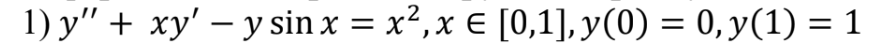

In [4]:
x1, x2 = 0, 1     
N = 100           
h = (x2 - x1) / N
x = np.linspace(x1, x2, N + 1)

### 1. Приведення рівняння до такого вигляду 
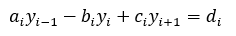
### за допомогою різницевої апроксимації першої і другої похідної
### y' = 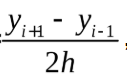, y" = 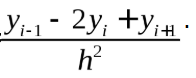

In [5]:
a_i = np.zeros(N-1) 
b_i = np.zeros(N-1)
c_i = np.zeros(N-1)
d_i = np.zeros(N-1)

A = x
B = -np.sin(x)
C = x**2

for i in range(1, N):
    
    a_i[i-1] = 1/h**2 - A[i]/(2*h) 
    b_i[i-1] = -2/h**2 + B[i]
    c_i[i-1] = 1/h**2 + A[i]/(2*h)
    
    d_i[i-1] = C[i]

### 2. Умови Діріхле

### 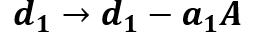
### 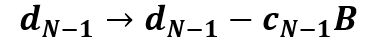

In [6]:
y0 = 0  # A
yN = 1  # B

d_i[0] -= a_i[0] * y0       
d_i[-1] -= c_i[-1] * yN     

### 3. Метод прогонки Томаса
- знаходимо рекурентні співвідношення з першого рівнння: 
### b1 * y1 + c2 * y2 = d1 (y0=0)
### y1 = - c1/b1 * y2 + d1/b1
- потім находимо рекурентні співвідношення для наступних кроків
### Підставляючи yi-1 = - alpha_i-1 * y2 + beta_i-1 у рівняння
- вкінці робимо зворотний хід

In [7]:
alpha = np.zeros(N-1)
beta = np.zeros(N-1)

alpha[0] = -c_i[0] / b_i[0]
beta[0] = d_i[0] / b_i[0]

for i in range(1, N-1):
    alpha[i] = -c_i[i] / (b_i[i] + a_i[i] * alpha[i-1])
    beta[i] = (d_i[i] - a_i[i] * beta[i-1]) / (b_i[i] + a_i[i] * alpha[i-1])

y = np.zeros(N+1)
y[0], y[-1] = 0, 1
y[N-1] = beta[-1]

for i in range(N-2, 0, -1):
    y[i] = alpha[i] * y[i+1] + beta[i]


### 4. Графік

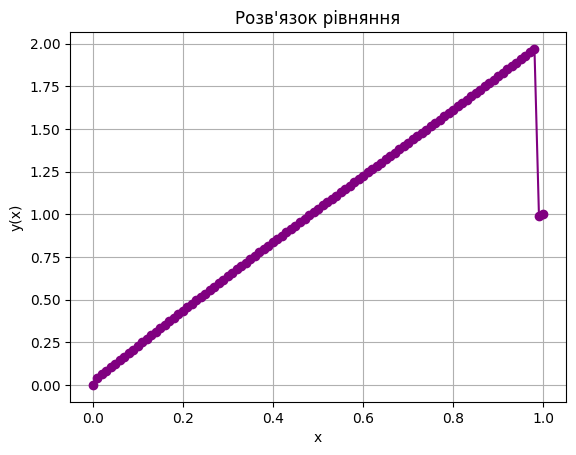

In [8]:
plt.plot(x, y, '-o', color='purple')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title("Розв'язок рівняння")
plt.grid(True)